# CS289 HW2 (Jiajie Zhang 2023.11.22)

In [2]:
try:
    from google.colab import output
    print('Running on CoLab')
    output.enable_custom_widget_manager()
    !pip install ipympl
    !pip install roboticstoolbox-python>=1.0.2
    !pip install --no-deps rvc3python
    COLAB = True
except ModuleNotFoundError:
    COLAB = False

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr_or_assign"
from IPython.display import HTML
from numpy import sqrt
%matplotlib widget
import matplotlib.pyplot as plt

# add RTB examples folder to the path
import sys, os.path
import RVC3 as rvc
sys.path.append(os.path.join(rvc.__path__[0], 'models'))

# helper function to run bdsim in a subprocess and transfer results using a pickle file
import pickle
def run_shell(tool, **params):
    global out
    pyfile = os.path.join(rvc.__path__[0], "models", tool+".py")
    cmd = f"python {pyfile} -H +a -o"
    for key, value in params.items():
        cmd += f' --global "{key}={value}"'
    print(cmd)
    os.system(cmd)
    with open("bd.out", "rb") as f:
        out = pickle.load(f)
        
# ------ standard imports ------ #
import numpy as np
from scipy import optimize
import math
from math import pi
np.set_printoptions(
    linewidth=120, formatter={
        'float': lambda x: f"{0:8.4g}" if abs(x) < 1e-10 else f"{x:8.4g}"})
np.random.seed(0)
from spatialmath import *
from spatialmath.base import *
from roboticstoolbox import *

## Problem2.1

In [3]:
a1 = 2; a2 = 2 * sqrt(2); a3 = 2;
e = ET2.tx(a1) * ET2.R() * ET2.tx(a2) * ET2.R() * ET2.tx(a3)

tx(2) ⊕ R(q0) ⊕ tx(2.828) ⊕ R(q1) ⊕ tx(2)


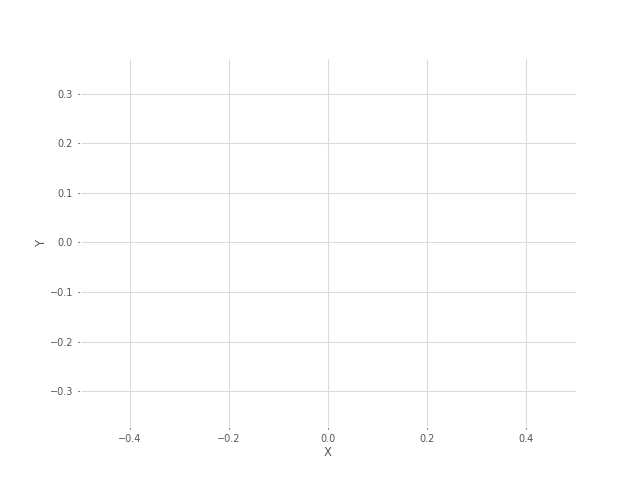

In [4]:
e.plot(np.deg2rad([-135,135]));

## Problem2.2

In [5]:
robot = ERobot2([
  Link2(ET2.R(), name="link1"),
  Link2(ET2.tx(1) * ET2.tx(1.2) * ET2.ty(-0.5) * ET2.R(), name="link2", parent="link1"),
  Link2(ET2.tx(1), name="ee_1", parent="link2"),
  Link2(ET2.tx(1) * ET2.tx(0.6) * ET2.ty(0.5) * ET2.R(), name="link3", parent="link1"),
  Link2(ET2.tx(1) * ET2.tx(2.4) * ET2.ty(1.0) * ET2.R(), name = "link4", parent="link3"),
  Link2(ET2.tx(1) * ET2.tx(3.6) * ET2.ty(1.5) * ET2.R(), name = "link5", parent="link4"),
  Link2(ET2.tx(1) * ET2.tx(4.8) * ET2.ty(2.0) * ET2.R(), name = "link6", parent="link5"),
  Link2(ET2.tx(1), name="ee_2", parent="link6") ], name="branched");

In [6]:
a1 = 1; a2 = 1;
robot6 = ERobot(ET.Rz() * ET.Ry()\
                * ET.tz(a1) * ET.Ry() * ET.tz(a2)\
                * ET.Rz() * ET.Ry() * ET.Rz())

ERobot: , 6 joints (RRRRRR)
┌─────┬────────┬───────┬────────┬─────────────────────┐
│link │  link  │ joint │ parent │ ETS: parent to link │
├─────┼────────┼───────┼────────┼─────────────────────┤
│   0 │ link0  │     0 │ BASE   │ Rz(q0)              │
│   1 │ link1  │     1 │ link0  │ Ry(q1)              │
│   2 │ link2  │     2 │ link1  │ tz(1) ⊕ Ry(q2)      │
│   3 │ link3  │     3 │ link2  │ tz(1) ⊕ Rz(q3)      │
│   4 │ link4  │     4 │ link3  │ Ry(q4)              │
│   5 │ @link5 │     5 │ link4  │ Rz(q5)              │
└─────┴────────┴───────┴────────┴─────────────────────┘

In [7]:
branch1_links = [Link(ET.tx(1) * ET.Ry())]

[Link("", tx(1) ⊕ Ry(q))]

# 验证1-1

In [17]:
import sympy

In [18]:
a1, a2 = sympy.symbols("a1, a2")

In [19]:
e = ET2.R() * ET2.tx(a1) * ET2.R() * ET2.tx(a2)

R(q0) ⊕ tx(a1) ⊕ R(q1) ⊕ tx(a2)


In [20]:
q0 ,q1 = sympy.symbols("q0 q1")

In [21]:
TE = e.fkine([q0, q1])

  cos(q0 + q1) -sin(q0 + q1) a1*cos(q0) + a2*cos(q0 + q1)  
  sin(q0 + q1) cos(q0 + q1) a1*sin(q0) + a2*sin(q0 + q1)  
  0            0            1             
